In [32]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [33]:

dfs = []
chunk_size = 2000  # based on your memory constraints

for chunk in pd.read_csv('youtube-science-comments.csv', chunksize=chunk_size):
    dfs.append(chunk)

df = pd.concat(dfs, ignore_index=True)

In [34]:
df.head(10)

,comment_id,author_id,author_name,content,published_at,uploader,title
0,UgzZBMPR-xd6oC38S514AaABAg,UCpcFzGk08RQIgAb4eaMCylQ,Nothing,Love u man,2021-11-04T14:17:02Z,William Osman,I'm done
1,Ugywov1iPO3spboNi3B4AaABAg,UCsqqQhR3AL7_nvUvjsITqmg,Gummieutermann,People gonna hate whatever you do. You are a k...,2021-11-04T14:01:44Z,William Osman,I'm done
2,UgxI3SQhmm-6uYXS4dN4AaABAg,UCmh9p0j4MOY9SWy-hiOK9cw,Salametti,i love you dude <3,2021-11-04T13:53:56Z,William Osman,I'm done
3,UgxTEVEus-QkethXNDF4AaABAg,UCPY__NUkvODuxGdD3C0E4sA,Joseph Whitworth,Don't let idiots get you down man. Negativity ...,2021-11-04T13:41:49Z,William Osman,I'm done
4,UgxvjTV3xZw4drN3gY14AaABAg,UCB0KOBq1bpYrHFGf4SG6Xpw,Thusharika Botheju,Your vids are da best!!!!!!,2021-11-04T13:40:20Z,William Osman,I'm done
5,Ugz7rerPdIScTD_RuVh4AaABAg,UCANktY3nI0I1iBFzLki9F3g,Road Kill,"awww man, It is so sad to see a fully grown ma...",2021-11-04T12:40:55Z,William Osman,I'm done
6,Ugw4WNJzXZtjEwxnKlF4AaABAg,UCU8D8G8OZM_tX5-RnNuCC5A,Tyler Petrus,Love you Big Willie. Take care of yourself bro!,2021-11-04T12:15:13Z,William Osman,I'm done
7,UgzHiP40YP0dpHgVwtF4AaABAg,UCo6sNt8PRLuL9DBhmRVUTrg,Jaden Ciminieri,Literally have been watching your videos for y...,2021-11-04T11:40:01Z,William Osman,I'm done
8,Ugwn1bRfy9rb2eKD7ah4AaABAg,UCvf_Gt-243YVxJQ1c8DiUkw,Saber Sin,"Didn't this guy dox someone? Yikes, now he's c...",2021-11-04T11:15:12Z,William Osman,I'm done
9,UgyQjLrwCbhma0X4N8J4AaABAg,UC-Y-ftoJRK4mNac-v9Q-oKw,Black Wave,"Hm, so William, i normally don't comment under...",2021-11-04T11:05:22Z,William Osman,I'm done


In [35]:
df.columns

Index(['comment_id', 'author_id', 'author_name', 'content', 'published_at',
       'uploader', 'title'],
      dtype='object')

In [36]:
df[["Comments"]] = df[["content"]]
df = df[["Comments"]]

In [37]:
df.isnull().sum()

Comments    2064
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.describe()

,Comments
count,507510
unique,473295
top,Anyone watching in 2030?
freq,1741


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [42]:
import nltk
from nltk.corpus import stopwords
import string
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [43]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [44]:
tqdm.pandas(desc="Cleaning progress")
df["Comments"] = df["Comments"].progress_apply(clean)

Cleaning progress: 100%|█████████████████████████████████████████████████████| 507510/507510 [01:01<00:00, 8199.18it/s]


In [16]:
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []

# Iterate over each comment and calculate sentiment scores
for comment in tqdm(df["Comments"]):
    scores = sentiments.polarity_scores(comment)
    positive_scores.append(scores["pos"])
    negative_scores.append(scores["neg"])
    neutral_scores.append(scores["neu"])
    compound_scores.append(scores["compound"])

df["Positive"] = positive_scores
df["Negative"] = negative_scores
df["Neutral"] = neutral_scores
df["Compound"] = compound_scores


100%|███████████████████████████████████████████████████████████████████████| 507510/507510 [00:43<00:00, 11645.51it/s]


In [17]:
data = df[["Comments", "Positive", 
             "Negative", "Neutral","Compound"]]
print(data.head())

                                            Comments  Positive  Negative  \
0                                         love u man     0.808     0.000   
1  peopl gonna hate whatev king love video keep h...     0.441     0.151   
2                                         love dude      0.808     0.000   
3  dont let idiot get man negat everywher tri ign...     0.274     0.210   
4                                        vid da best     0.677     0.000   

   Neutral  Compound  
0    0.192    0.6369  
1    0.408    0.7964  
2    0.192    0.6369  
3    0.516    0.6126  
4    0.323    0.6369  


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

In [19]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  79589.72299998786
Negative:  45211.491000002745
Neutral:  374851.1190000277


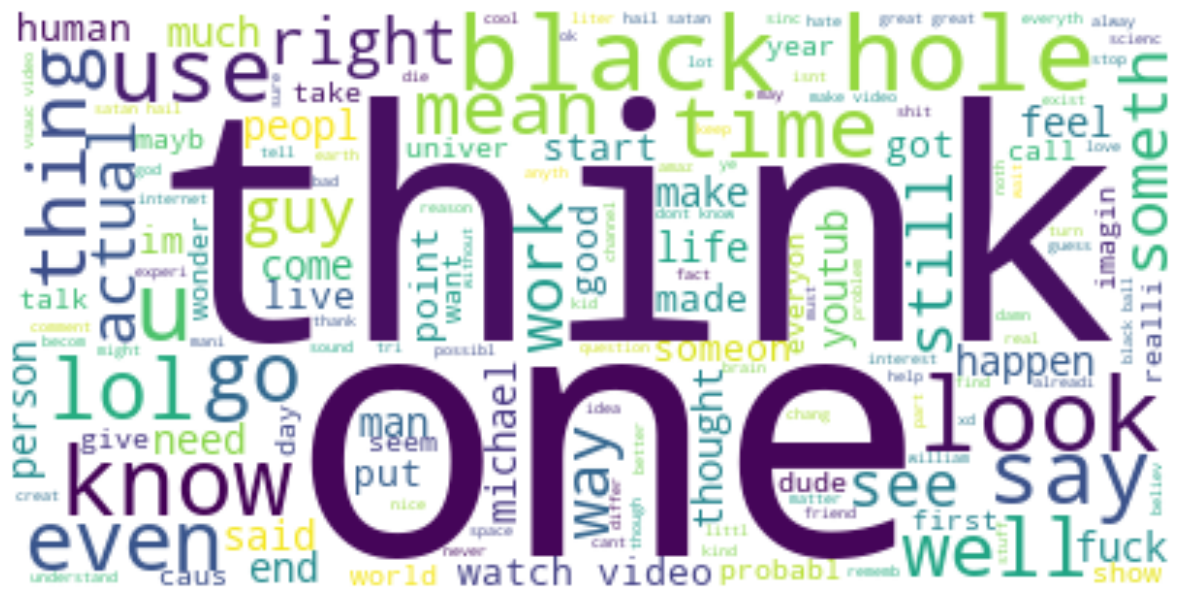

In [20]:
# text = " ".join(i for i in data.Comments)
# stopwords = set(STOPWORDS)
# wordcloud = WordCloud(stopwords=stopwords, 
#                       background_color="white").generate(text)
# plt.figure( figsize=(15,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [21]:
data.head()

,Comments,Positive,Negative,Neutral,Compound
0,love u man,0.808,0.000,0.192,0.6369
1,peopl gonna hate whatev king love video keep h...,0.441,0.151,0.408,0.7964
2,love dude,0.808,0.000,0.192,0.6369
3,dont let idiot get man negat everywher tri ign...,0.274,0.210,0.516,0.6126
4,vid da best,0.677,0.000,0.323,0.6369


In [22]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,Comments,Positive,Negative,Neutral,Compound,Sentiment
0,love u man,0.808,0.000,0.192,0.6369,Positive
1,peopl gonna hate whatev king love video keep h...,0.441,0.151,0.408,0.7964,Positive
2,love dude,0.808,0.000,0.192,0.6369,Positive
3,dont let idiot get man negat everywher tri ign...,0.274,0.210,0.516,0.6126,Positive
4,vid da best,0.677,0.000,0.323,0.6369,Positive


In [23]:
print(data["Sentiment"].value_counts())

Neutral     234001
Positive    174322
Negative     99187
Name: Sentiment, dtype: int64


In [24]:
data.to_csv("new_data.csv")

Processing comments: 507510it [00:00, 1684323.35it/s]


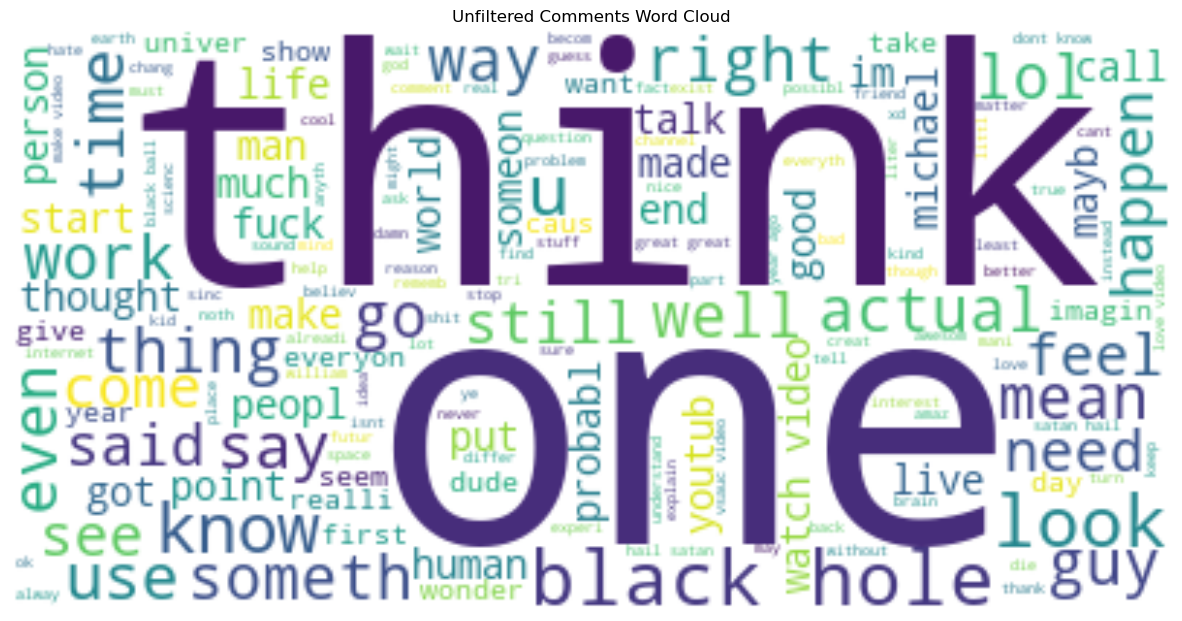

In [25]:
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_corpus = []
negative_corpus = []
unfiltered_corpus = []

for comment, pos, neg in tqdm(zip(data['Comments'], data['Positive'], data['Negative']), desc="Processing comments"):
    if pos > neg:
        positive_corpus.append(comment)
    elif neg > pos:
        negative_corpus.append(comment)
    unfiltered_corpus.append(comment)

positive_text = ' '.join(positive_corpus)
negative_text = ' '.join(negative_corpus)
unfiltered_text = ' '.join(unfiltered_corpus)

stopwords = set(STOPWORDS)

wordcloud_unfiltered = WordCloud(stopwords=stopwords, background_color="white").generate(unfiltered_text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_unfiltered, interpolation='bilinear')
plt.axis("off")
plt.title("Unfiltered Comments Word Cloud")

plt.show()


Text(0.5, 1.0, 'Positive Comments Word Cloud')

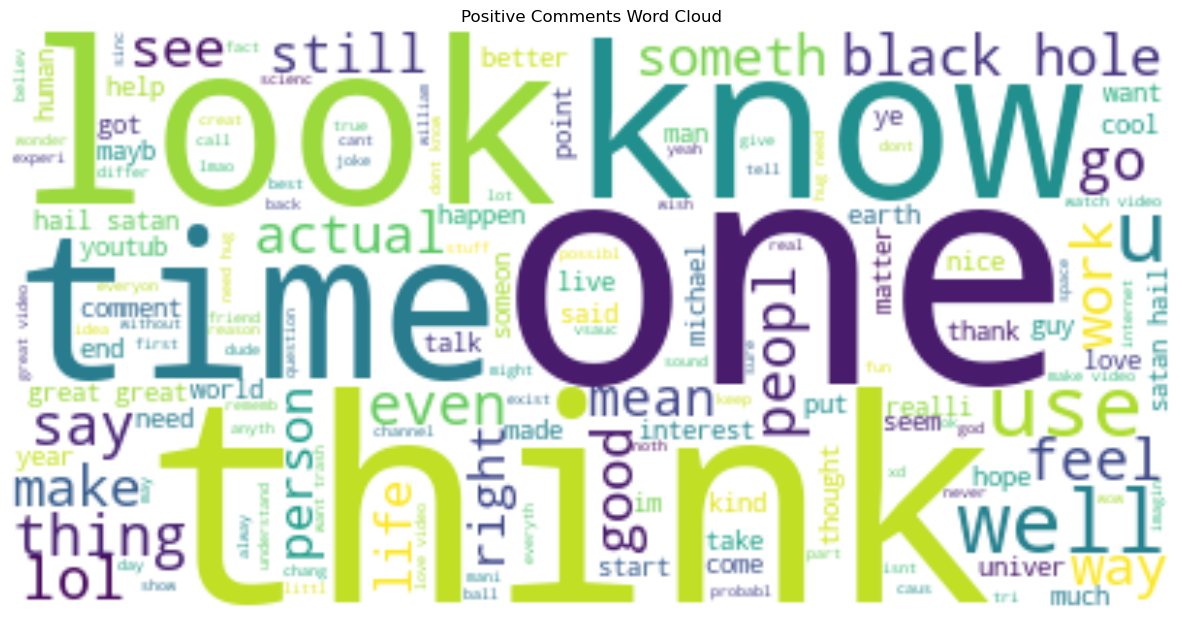

In [26]:
# Positive word cloud
wordcloud_positive = WordCloud(stopwords=stopwords, background_color="white").generate(positive_text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Comments Word Cloud")



Text(0.5, 1.0, 'Negative Comments Word Cloud')

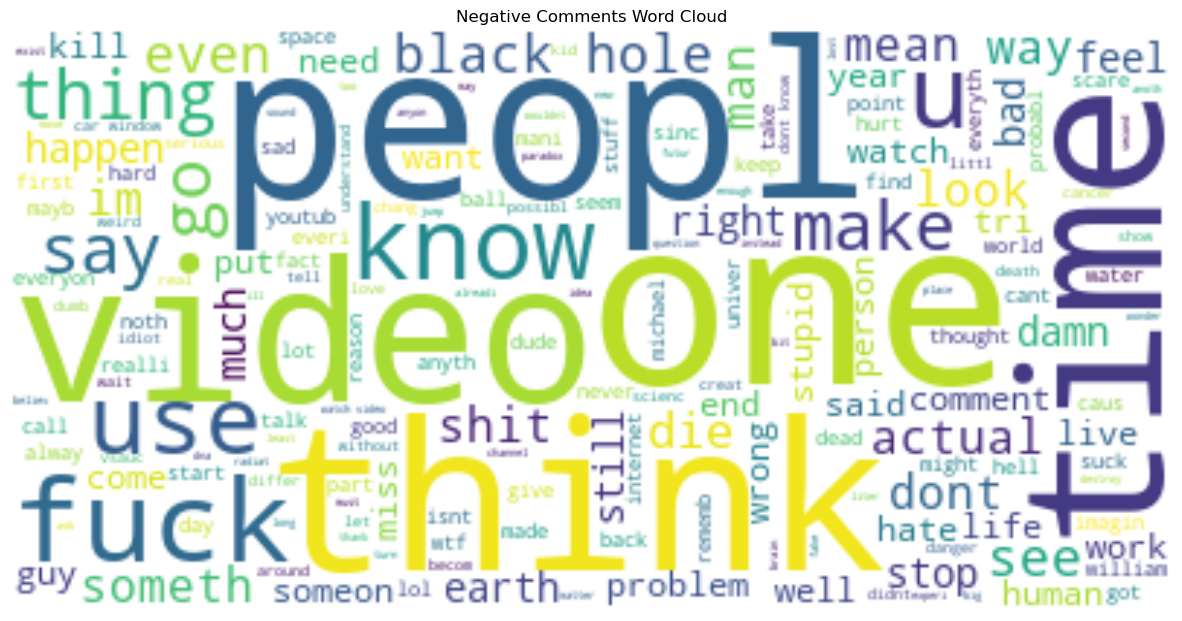

In [27]:
# Negative word cloud
wordcloud_negative = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Comments Word Cloud")


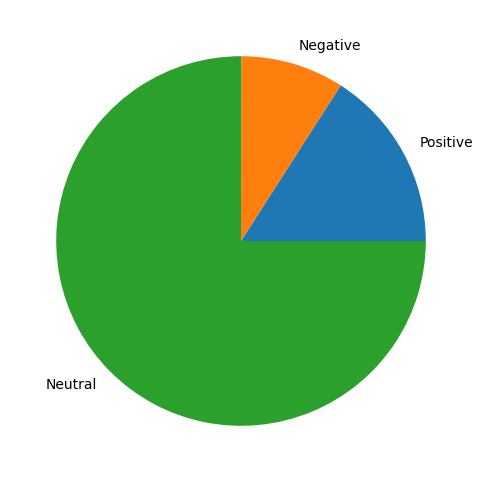

In [28]:
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [x,y,z]

plt.figure(figsize=(10, 6)) # setting size

# plotting pie chart
plt.pie(comment_counts, labels=labels)

# Displaying Pie Chart
plt.show()


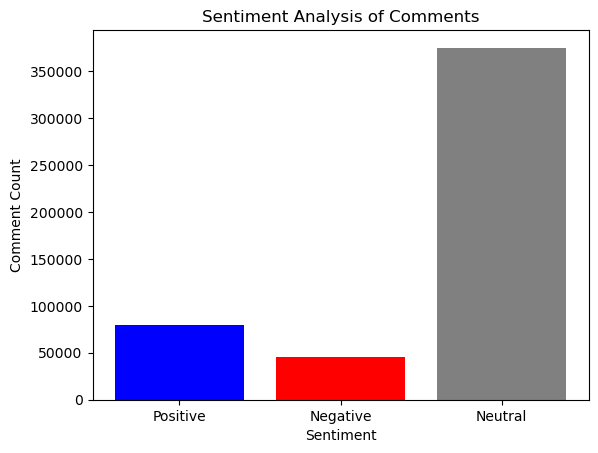

In [29]:
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])

# Adding labels and title to the plot
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')

# Displaying the chart
plt.show()
